Shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Target distribution:
1    357
0    212
Name: count, dtype: int64
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1 score: 0.9861111111111112

Classification report:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



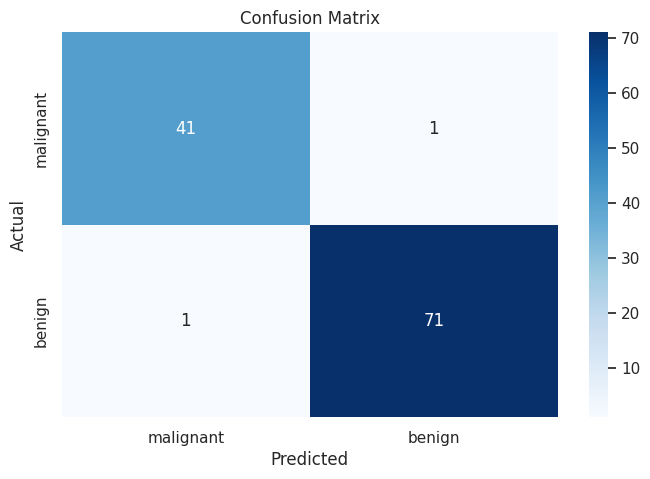

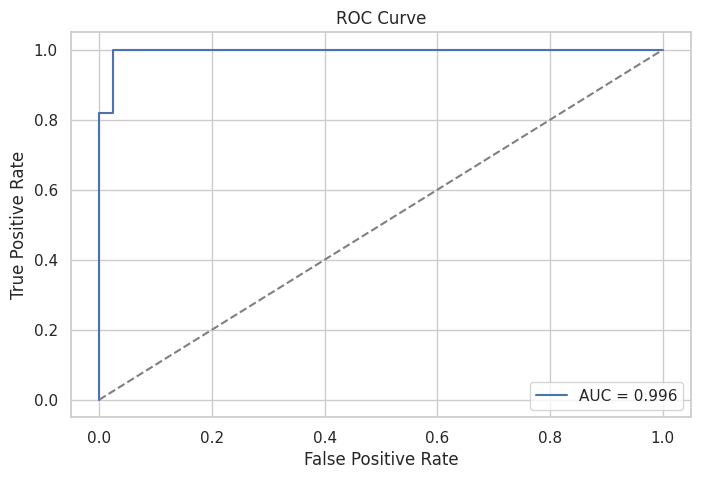

ROC AUC: 0.9957010582010581


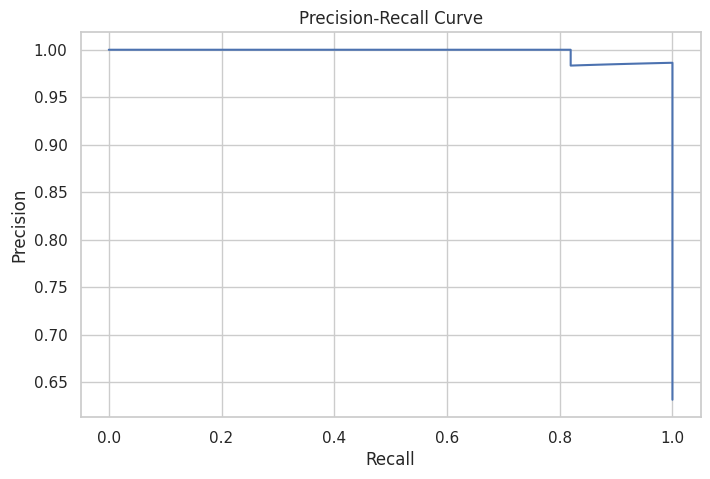

{'threshold': 0.3, 'precision': 0.972972972972973, 'recall': 1.0, 'f1': 0.9863013698630136, 'accuracy': 0.9824561403508771}
{'threshold': 0.4, 'precision': 0.9861111111111112, 'recall': 0.9861111111111112, 'f1': 0.9861111111111112, 'accuracy': 0.9824561403508771}
{'threshold': 0.5, 'precision': 0.9861111111111112, 'recall': 0.9861111111111112, 'f1': 0.9861111111111112, 'accuracy': 0.9824561403508771}
{'threshold': 0.6, 'precision': 0.9855072463768116, 'recall': 0.9444444444444444, 'f1': 0.9645390070921985, 'accuracy': 0.956140350877193}
{'threshold': 0.7, 'precision': 0.9850746268656716, 'recall': 0.9166666666666666, 'f1': 0.9496402877697842, 'accuracy': 0.9385964912280702}


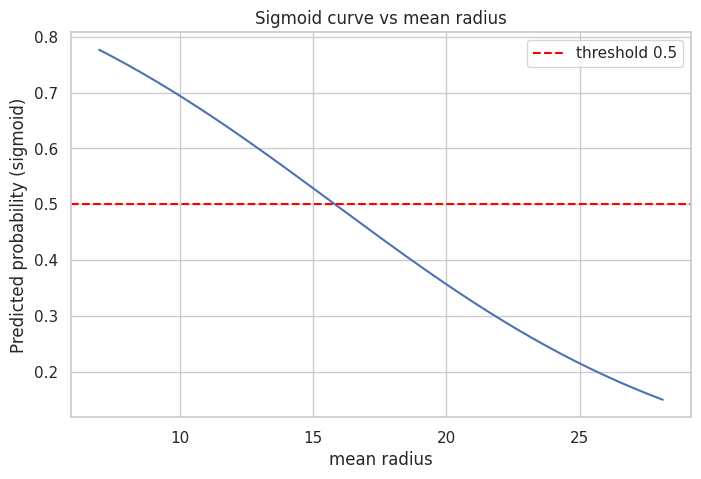

,feature,coefficient
21,worst texture,-1.242272
10,radius error,-1.087929
23,worst area,-0.979282
13,area error,-0.958096
20,worst radius,-0.946000
27,worst concave points,-0.945296
28,worst symmetry,-0.928729
26,worst concavity,-0.827180
22,worst perimeter,-0.764807
24,worst smoothness,-0.759567


,feature,coefficient
21,worst texture,-1.242272
10,radius error,-1.087929
23,worst area,-0.979282
13,area error,-0.958096
20,worst radius,-0.946000
27,worst concave points,-0.945296
28,worst symmetry,-0.928729
26,worst concavity,-0.827180
22,worst perimeter,-0.764807
24,worst smoothness,-0.759567



Logistic Regression task completed.


In [3]:
# ------------------------------
# Logistic Regression (binary)
# Dataset: Breast Cancer Wisconsin (sklearn)
# ------------------------------

# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve,
    accuracy_score, precision_score, recall_score, f1_score
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# 2) Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign (check data.target_names)

print("Shape:", X.shape)
display(X.head())
print("Target distribution:")
print(y.value_counts())

# 3) Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Standardize features (important for LR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5) Fit logistic regression
lr = LogisticRegression(max_iter=10000, solver='liblinear')
lr.fit(X_train_scaled, y_train)

# 6) Predictions & probabilities
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]  # probability for class 1

# 7) Basic evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# 8) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 9) ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("ROC AUC:", auc)

# 10) Precision-Recall curve
prec, rec, pr_thresh = precision_recall_curve(y_test, y_proba)
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# 11) Threshold tuning (example)
# Default threshold 0.5. Try different thresholds and show precision/recall.
def evaluate_threshold(th):
    y_pred_t = (y_proba >= th).astype(int)
    return {
        "threshold": th,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t),
        "accuracy": accuracy_score(y_test, y_pred_t)
    }

for thr in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print(evaluate_threshold(thr))

# 12) Sigmoid function visualization (decision boundary intuition)
w = lr.coef_[0]
b = lr.intercept_[0]
# pick a single feature for visualization: mean radius (if present)
feat = "mean radius"
if feat in X.columns:
    x_vals = np.linspace(X[feat].min(), X[feat].max(), 200)
    # standardize the chosen feature using scaler fitted params
    feat_index = list(X.columns).index(feat)
    mean = scaler.mean_[feat_index]
    scale = np.sqrt(scaler.var_[feat_index])
    x_std = (x_vals - mean) / scale
    z = w[feat_index] * x_std + b
    sigmoid = 1 / (1 + np.exp(-z))
    plt.plot(x_vals, sigmoid)
    plt.xlabel(feat)
    plt.ylabel("Predicted probability (sigmoid)")
    plt.title(f"Sigmoid curve vs {feat}")
    plt.axhline(0.5, color='red', linestyle='--', label='threshold 0.5')
    plt.legend()
    plt.show()
else:
    print(f"Feature '{feat}' not found for sigmoid plot. Skipping.")

# 13) Coefficients (feature importance direction)
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lr.coef_[0]
})

coef_df = coef_df.sort_values(
    by="coefficient",
    key=lambda x: x.abs(),
    ascending=False
)

display(coef_df.head(10))

display(coef_df.head(10))

# 14) Save model artifacts (optional)
# You can save scaler and model using joblib if needed (uncomment)
# import joblib
# joblib.dump(lr, "logistic_model.joblib")
# joblib.dump(scaler, "scaler.joblib")

print("\nLogistic Regression task completed.")
